Optimized Parameters:
Radius: 3.0188842139262824
Center X: -0.00373202992487783
Center Y: 0.046235578067673165


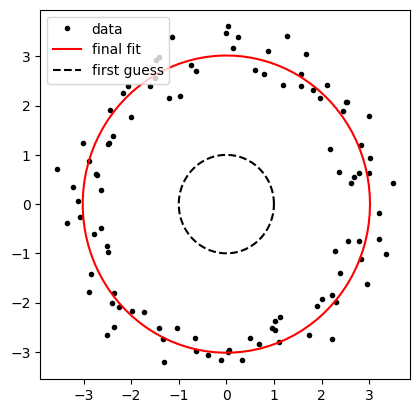

In [1]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the circlefit function
def circlefit(th, r):
    x = r * np.cos(th)
    y = r * np.sin(th)
    return x, y

# Define the residual function to minimize
def circle_residual(params, x, y):
    r, cx, cy = params
    distances = np.sqrt((x - cx)**2 + (y - cy)**2)
    #distances = np.linalg.norm(np.array([x - cx, y - cy]), axis=0)
    return distances - r

# Generate some example data (x, y points on a circle)
n = 100
th = np.linspace(0, np.pi*2, n)
r = 3

mean = 0
variance = r**-2
std = np.sqrt(variance)

x = r*np.cos(th) + np.random.normal(0, std, n)
y = r*np.sin(th) + np.random.normal(0, std, n)

# Initial guess for the parameters (radius, center_x, center_y)
initial_guess = [1.0, 1.0, 1.0]

# Perform the least squares fit
result = least_squares(circle_residual, initial_guess, args=(x, y))

# Extract the optimized parameters
optimized_radius, optimized_center_x, optimized_center_y = result.x

# Print the optimized parameters
print("Optimized Parameters:")
print(f"Radius: {optimized_radius}")
print(f"Center X: {optimized_center_x}")
print(f"Center Y: {optimized_center_y}")

plt.plot(x, y, 'k.', label = 'data')
plt.plot(circlefit(th, optimized_radius)[0], circlefit(th, optimized_radius)[1], 'r', label = 'final fit')
plt.plot(circlefit(th, initial_guess[0])[0], circlefit(th, initial_guess[0])[1], 'k--', label = 'first guess')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()